Comparison between data of two Digital Terrain Models (DTM) with a precision of respectively 25m for the first one and 5m for the second one.

DTM 25m:
Raster dimensions: 10663 x 8150
Pixel dimensions: 25.0 x 25.0
Data type: float32
Number of data per cell: 625.0

DTM 5m:
Raster dimensions: 53394 x 40748
Pixel dimensions: 5.0 x 5.0
Data type: float32
Number of data per cell: 25.0

Cervo Valley DTM plots.



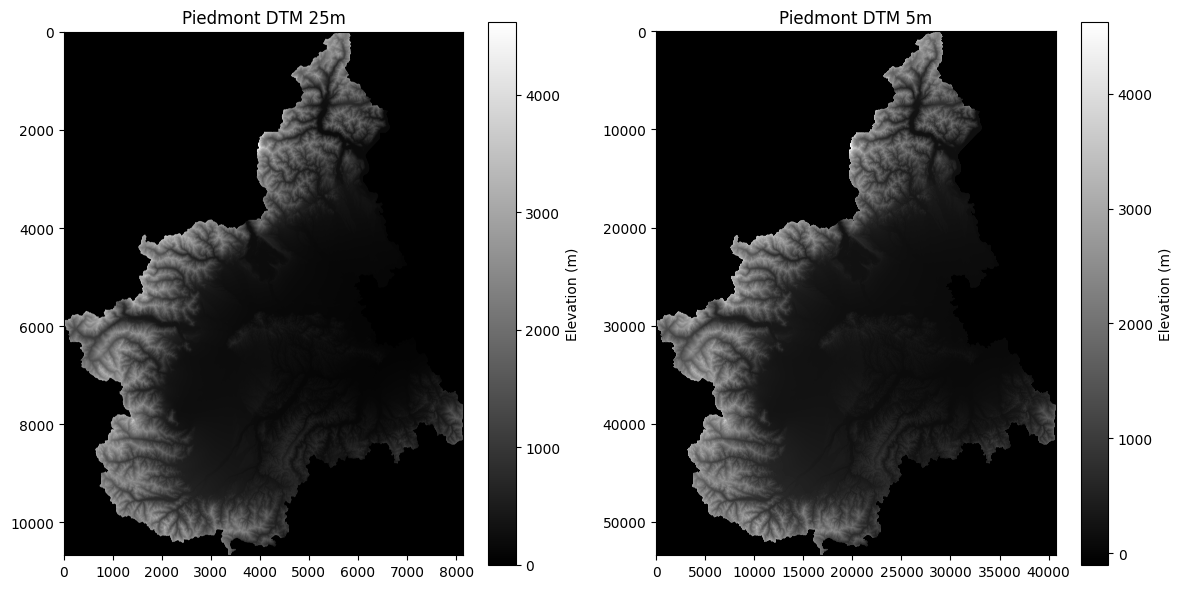

In [6]:
import rasterio
import matplotlib.pyplot as plt

# GeoTIFF file paths
DTM_25m =  r"C:\Users\noemi\Politecnico Di Torino Studenti Dropbox\Noemi Sobrino\Magistrale\II anno_UGent\Thesis\QGIS_PYTHON\DTM+BDTRE_QGIS\DTM\DTM25\dtm25.tif"
DTM_5m = r"C:\Users\noemi\Politecnico Di Torino Studenti Dropbox\Noemi Sobrino\Magistrale\II anno_UGent\Thesis\QGIS_PYTHON\DTM+BDTRE_QGIS\DTM\DTM5\DTM5 Piemonte.tif"

# Function to read the array of a GeoTIFF file
def read_array(file):
    with rasterio.open(file) as src:
        return src.read(1)

# Function to analyze the dimensions of the raster file and the number of data in each cell
def analyze_dimensions(file):
    with rasterio.open(file) as src:
        # Read raster dimensions
        rows, cols = src.height, src.width
        
        # Read pixel resolution
        pixel_size_x, pixel_size_y = src.res
        
        # Read raster data type
        data_type = src.dtypes[0]
        
        # Calculate the number of data in each cell
        num_data_per_cell = pixel_size_x * pixel_size_y
        
        return rows, cols, pixel_size_x, pixel_size_y, data_type, num_data_per_cell

# Analyze raster files
rows_1, cols_1, pixel_size_x_1, pixel_size_y_1, data_type_1, num_data_per_cell_1 = analyze_dimensions(DTM_25m)
rows_2, cols_2, pixel_size_x_2, pixel_size_y_2, data_type_2, num_data_per_cell_2 = analyze_dimensions(DTM_5m)

# Read arrays of raster files
array_1 = read_array(DTM_25m)
array_2 = read_array(DTM_5m)

# Print information
print("\033[1;30;20mComparison between data of two Digital Terrain Models (DTM) with a precision of respectively 25m for the first one and 5m for the second one.\033[0m")

print("\nDTM 25m:")
print(f"Raster dimensions: {rows_1} x {cols_1}")
print(f"Pixel dimensions: {pixel_size_x_1} x {pixel_size_y_1}")
print(f"Data type: {data_type_1}")
print(f"Number of data per cell: {num_data_per_cell_1}\n")

print("DTM 5m:")
print(f"Raster dimensions: {rows_2} x {cols_2}")
print(f"Pixel dimensions: {pixel_size_x_2} x {pixel_size_y_2}")
print(f"Data type: {data_type_2}")
print(f"Number of data per cell: {num_data_per_cell_2}")

# Plot the two raster files
print("\n\033[1;30;20mCervo Valley DTM plots.\033[0m\n", )
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(array_1, cmap='grey')
plt.colorbar(label='Elevation (m)')
plt.title('Piedmont DTM 25m')

plt.subplot(1, 2, 2)
plt.imshow(array_2, cmap='grey')
plt.colorbar(label='Elevation (m)')
plt.title('Piedmont DTM 5m')

plt.tight_layout()
plt.show()
